In [4]:
import numpy as np

# Cohen's d 계산 함수
def cohens_d(x, y):
    nx = len(x)
    ny = len(y)
    pooled_std = np.sqrt(((nx - 1) * np.std(x, ddof=1) ** 2 + 
                          (ny - 1) * np.std(y, ddof=1) ** 2) / (nx + ny - 2))
    d = (np.mean(x) - np.mean(y)) / pooled_std
    return d

# 금융 예제: 두 전략의 월간 수익률 시뮬레이션
np.random.seed(42)

# 전략 A (시장보다 약간 우세한 전략)
returns_A = np.random.normal(loc=0.012, scale=0.03, size=100)  # 평균 1.2%, SD=3%

# 전략 B (평균 성과는 낮지만 변동성도 약간 낮음)
returns_B = np.random.normal(loc=0.005, scale=0.02, size=100)  # 평균 0.5%, SD=2%

d_value = cohens_d(returns_A, returns_B)

print(f"Cohen's d (전략 A vs 전략 B): {d_value:.3f}")


Cohen's d (전략 A vs 전략 B): 0.146


In [5]:
# 계산과 함께 기본 통계 출력
print("전략 A mean:", np.mean(returns_A))
print("전략 B mean:", np.mean(returns_B))
print("전략 A std:", np.std(returns_A, ddof=1))
print("전략 B std:", np.std(returns_B, ddof=1))
print("Cohen's d:", d_value)


전략 A mean: 0.008884604478177184
전략 B mean: 0.005446091740998478
전략 A std: 0.02724505284023402
전략 B std: 0.01907337932366207
Cohen's d: 0.14621470404413936


In [ ]:
# 히스토그램으로 두 전략의 차이를 시각화

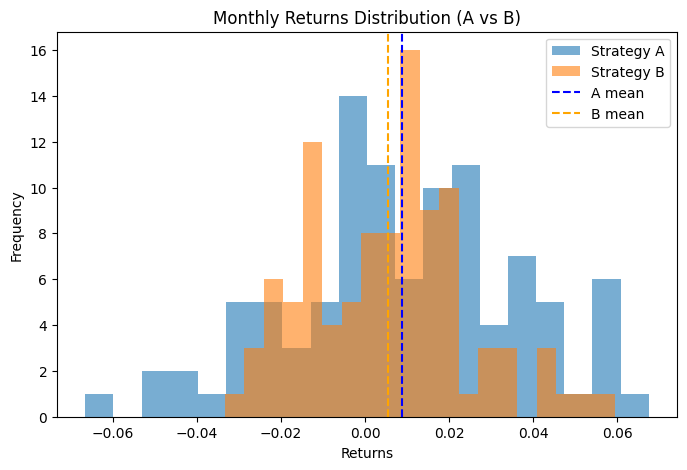

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(returns_A, bins=20, alpha=0.6, label="Strategy A")
plt.hist(returns_B, bins=20, alpha=0.6, label="Strategy B")
plt.axvline(np.mean(returns_A), color='blue', linestyle='--', label='A mean')
plt.axvline(np.mean(returns_B), color='orange', linestyle='--', label='B mean')
plt.title("Monthly Returns Distribution (A vs B)")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [ ]:
# Sharpe Ratio 분포의 Cohen’s d 계산

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# 1. Cohen's d 함수 정의
# ----------------------------
def cohens_d(x, y):
    x = np.array(x)
    y = np.array(y)
    nx = len(x)
    ny = len(y)
    pooled_std = np.sqrt(((nx - 1) * np.std(x, ddof=1)**2 +
                          (ny - 1) * np.std(y, ddof=1)**2) / (nx + ny - 2))
    d = (np.mean(x) - np.mean(y)) / pooled_std
    return d

# ----------------------------
# 2. 가상 수익률 데이터 생성
# ----------------------------
np.random.seed(42)

n_months = 120  # 10년치 월간 데이터

# 전략 A: 수익률과 리스크가 조금 더 높은 전략
ret_A = np.random.normal(loc=0.012, scale=0.04, size=n_months)   # 평균 1.2%, SD 4%

# 전략 B: 수익률과 리스크가 모두 낮은 전략
ret_B = np.random.normal(loc=0.007, scale=0.025, size=n_months)  # 평균 0.7%, SD 2.5%

rf = 0.002  # 무위험 이자율(월간 0.2% 가정)

# ----------------------------
# 3. 롤링 Sharpe Ratio 계산 함수
# ----------------------------
def rolling_sharpe(returns, rf=0.0, window=12):
    """
    returns: 1D numpy array or pandas Series (월간 수익률)
    rf: 무위험 수익률 (동일 기간 단위)
    window: Sharpe 계산에 사용할 롤링 기간 (예: 12개월)
    """
    excess = returns - rf
    sr = pd.Series(excess).rolling(window=window).apply(
        lambda x: x.mean() / x.std(ddof=1) if x.std(ddof=1) != 0 else np.nan,
        raw=False
    )
    return sr.dropna()

# 12개월 롤링 Sharpe Ratio
sr_A = rolling_sharpe(ret_A, rf=rf, window=12)
sr_B = rolling_sharpe(ret_B, rf=rf, window=12)

print("샘플 개수 (Sharpe A):", len(sr_A))
print("샘플 개수 (Sharpe B):", len(sr_B))
print("Sharpe A mean:", sr_A.mean())
print("Sharpe B mean:", sr_B.mean())

# ----------------------------
# 4. Cohen's d 계산
# ----------------------------
d_value = cohens_d(sr_A, sr_B)
print(f"Cohen's d (Sharpe A vs B): {d_value:.3f}")


샘플 개수 (Sharpe A): 109
샘플 개수 (Sharpe B): 109
Sharpe A mean: 0.13447643060911182
Sharpe B mean: 0.26274733681832224
Cohen's d (Sharpe A vs B): -0.514


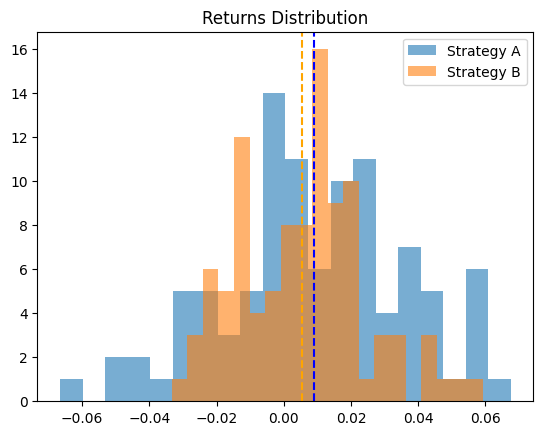

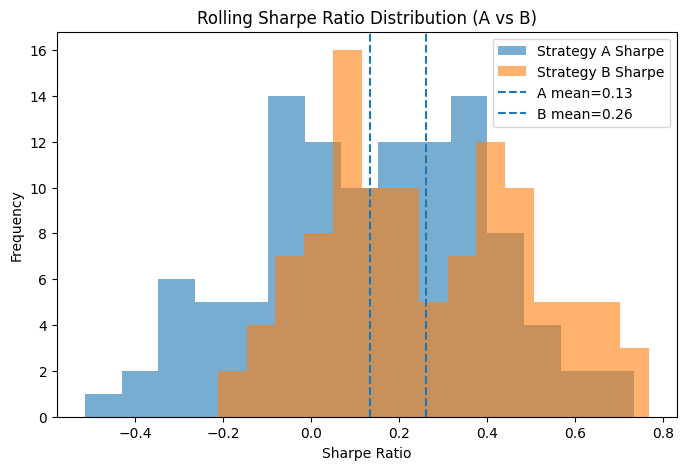

In [9]:
plt.figure(figsize=(8, 5))
plt.hist(sr_A, bins=15, alpha=0.6, label="Strategy A Sharpe")
plt.hist(sr_B, bins=15, alpha=0.6, label="Strategy B Sharpe")
plt.axvline(sr_A.mean(), linestyle='--', label=f"A mean={sr_A.mean():.2f}")
plt.axvline(sr_B.mean(), linestyle='--', label=f"B mean={sr_B.mean():.2f}")
plt.title("Rolling Sharpe Ratio Distribution (A vs B)")
plt.xlabel("Sharpe Ratio")
plt.ylabel("Frequency")
plt.legend()
plt.show()
